## Component One: Predicting Customer Spending Behaviour in Streaming Services.

In [15]:
# Import libraries
import pandas as pd
import numpy as np

# Read the dataset
df = pd.read_csv('/Users/dannywu/Library/CloudStorage/OneDrive-hull.ac.uk/AI/FinalProject/Streaming.csv')

# Check dataset size and preview
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (5000, 12)

First few rows:


,Customer_ID,Age,Gender,Subscription_Length,Region,Payment_Method,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
0,CUST000001,56.0,Male,54,South,PayPal,0,9.0,6.42,319,62.11,1
1,CUST000002,69.0,Female,21,East,Debit Card,1,2.0,13.77,166,37.27,1
2,CUST000003,46.0,Female,49,East,PayPal,3,8.0,19.91,207,61.82,0
3,CUST000004,32.0,Male,47,West,Debit Card,3,1.0,13.39,108,40.96,1
4,CUST000005,60.0,Male,6,East,Credit Card,2,NaN,13.18,65,45.97,0


In [16]:
# Check data types
print("--- Data Types ---")
print(df.dtypes)
print("\n")

# Check for missing values
print("--- Missing Values ---")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])
print("\n")

# Check for duplicates
print("--- Duplicate Rows ---")
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
print("\n")

# Dataset summary
print("--- Dataset Info ---")
df.info()

--- Data Types ---
Customer_ID                object
Age                       float64
Gender                     object
Subscription_Length         int64
Region                     object
Payment_Method             object
Support_Tickets_Raised      int64
Satisfaction_Score        float64
Discount_Offered          float64
Last_Activity               int64
Monthly_Spend             float64
Churned                     int64
dtype: object


--- Missing Values ---
                    Missing Count  Percentage
Age                           500        10.0
Satisfaction_Score            500        10.0


--- Duplicate Rows ---
Number of duplicate rows: 0


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             5000 non-null   object 
 1   Age                     4500 non-null   float64
 

In [17]:
# Handle missing values before modeling
# Fill Age with median and Satisfaction_Score with median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Satisfaction_Score'].fillna(df['Satisfaction_Score'].median(), inplace=True)

print("Missing values after imputation:")
print(df.isnull().sum().sum())

Missing values after imputation:
0


/var/folders/ql/b47wk6b932x3yf9lt49mf05m0000gn/T/ipykernel_61033/4161425077.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/ql/b47wk6b932x3yf9lt49mf05m0000gn/T/ipykernel_61033/4161425077.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [18]:
# Import libraries for regression and visualization
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette("husl")

#### Compare regression models that predict "Monthly Spend" based on a single numerical input feature. Based on your results, which numerical variable in the dataset is the best predictor of Monthly Spend and why? For each numerical input feature, does Monthly Spend fit better with a linear model or a non-linear model (e.g., polynomial regression)?

In [19]:
# Part (a): Single-feature regression
numerical_features = ['Age', 'Subscription_Length', 'Support_Tickets_Raised', 
                      'Satisfaction_Score', 'Discount_Offered', 'Last_Activity']

y = df['Monthly_Spend']
results = []

In [20]:
# Function to compare linear vs polynomial models
def compare_models(X, y, feature_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Linear model
    lin_model = LinearRegression()
    lin_model.fit(X_train, y_train)
    lin_pred = lin_model.predict(X_test)
    lin_r2 = r2_score(y_test, lin_pred)
    lin_rmse = np.sqrt(mean_squared_error(y_test, lin_pred))
    
    # Polynomial model (degree 2)
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    poly_pred = poly_model.predict(X_test_poly)
    poly_r2 = r2_score(y_test, poly_pred)
    poly_rmse = np.sqrt(mean_squared_error(y_test, poly_pred))
    
    # Determine best model
    if lin_r2 > poly_r2:
        best_model = 'Linear'
        best_r2 = lin_r2
        best_rmse = lin_rmse
    else:
        best_model = 'Polynomial'
        best_r2 = poly_r2
        best_rmse = poly_rmse
    
    return {
        'feature': feature_name,
        'linear_r2': lin_r2,
        'poly_r2': poly_r2,
        'best_model': best_model,
        'best_r2': best_r2,
        'best_rmse': best_rmse
    }

In [21]:
# Test each feature
for feature in numerical_features:
    X = df[[feature]]
    result = compare_models(X, y, feature)
    results.append(result)
    print(f"{feature}: Linear R²={result['linear_r2']:.4f}, Poly R²={result['poly_r2']:.4f}, Best={result['best_model']}")

Age: Linear R²=-0.0009, Poly R²=-0.0008, Best=Polynomial
Subscription_Length: Linear R²=0.2829, Poly R²=0.2820, Best=Linear
Support_Tickets_Raised: Linear R²=0.0178, Poly R²=0.0164, Best=Linear
Satisfaction_Score: Linear R²=0.5345, Poly R²=0.5345, Best=Polynomial
Discount_Offered: Linear R²=0.0446, Poly R²=0.0446, Best=Polynomial
Last_Activity: Linear R²=-0.0010, Poly R²=-0.0009, Best=Polynomial


In [22]:
# Find best single-feature predictor
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('best_r2', ascending=False)

print("\nBest single-feature predictors:")
print(results_df[['feature', 'best_model', 'best_r2']].to_string(index=False))

best_predictor = results_df.iloc[0]
print(f"\nBest predictor: {best_predictor['feature']} ({best_predictor['best_model']}, R²={best_predictor['best_r2']:.4f})")


Best single-feature predictors:
               feature best_model   best_r2
    Satisfaction_Score Polynomial  0.534518
   Subscription_Length     Linear  0.282882
      Discount_Offered Polynomial  0.044591
Support_Tickets_Raised     Linear  0.017760
                   Age Polynomial -0.000787
         Last_Activity Polynomial -0.000924

Best predictor: Satisfaction_Score (Polynomial, R²=0.5345)


#### Consider regression models that take multiple numerical variables as input features to predict "Monthly Spend". Does including multiple features improve prediction accuracy compared to single-variable models from part (a)?

In [23]:
# Part (b): Multi-feature regression
print("\n" + "="*50)
print("Multi-Feature Regression")
print("="*50)

X_multi = df[numerical_features]
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Linear model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_pred = lin_model.predict(X_test)
lin_r2 = r2_score(y_test, lin_pred)

# Polynomial model
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_pred = poly_model.predict(X_test_poly)
poly_r2 = r2_score(y_test, poly_pred)

print(f"Linear: R² = {lin_r2:.4f}")
print(f"Polynomial: R² = {poly_r2:.4f}")

if lin_r2 > poly_r2:
    best_multi_r2 = lin_r2
    best_multi_type = "Linear"
else:
    best_multi_r2 = poly_r2
    best_multi_type = "Polynomial"


Multi-Feature Regression
Linear: R² = 0.8861
Polynomial: R² = 0.8852


In [24]:
# Compare results
print("\n" + "="*50)
print("Comparison")
print("="*50)

best_single_r2 = best_predictor['best_r2']

print(f"Best single-feature: {best_predictor['feature']} - R² = {best_single_r2:.4f}")
print(f"Best multi-feature: {best_multi_type} - R² = {best_multi_r2:.4f}")

improvement = ((best_multi_r2 - best_single_r2) / best_single_r2) * 100
print(f"\nImprovement: {improvement:.2f}%")

if best_multi_r2 > best_single_r2:
    print("Multi-feature model performs better")
else:
    print("Single-feature model performs better")


Comparison
Best single-feature: Satisfaction_Score - R² = 0.5345
Best multi-feature: Linear - R² = 0.8861

Improvement: 65.78%
Multi-feature model performs better


### Graphs

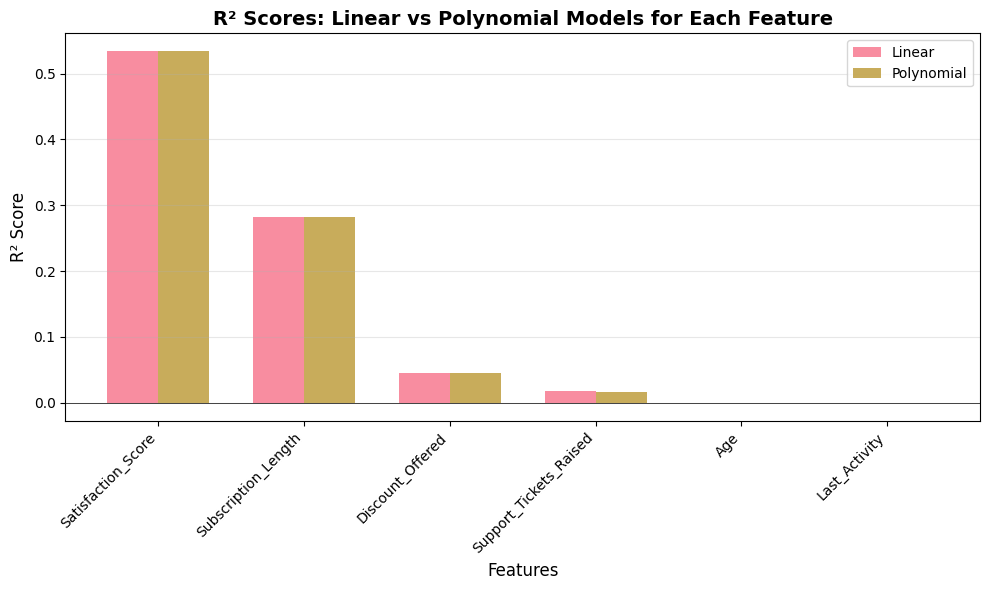

In [29]:
# Visualization 1: R² scores comparison for all features
fig, ax = plt.subplots(figsize=(10, 6))

# Get scores from results_df to match order
features = results_df['feature'].values
linear_scores = results_df['linear_r2'].values
poly_scores = results_df['poly_r2'].values

x = np.arange(len(features))
width = 0.35

bars1 = ax.bar(x - width/2, linear_scores, width, label='Linear', alpha=0.8)
bars2 = ax.bar(x + width/2, poly_scores, width, label='Polynomial', alpha=0.8)

ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('R² Score', fontsize=12)
ax.set_title('R² Scores: Linear vs Polynomial Models for Each Feature', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()


/opt/homebrew/Cellar/jupyterlab/4.4.7/libexec/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.4.7/libexec/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


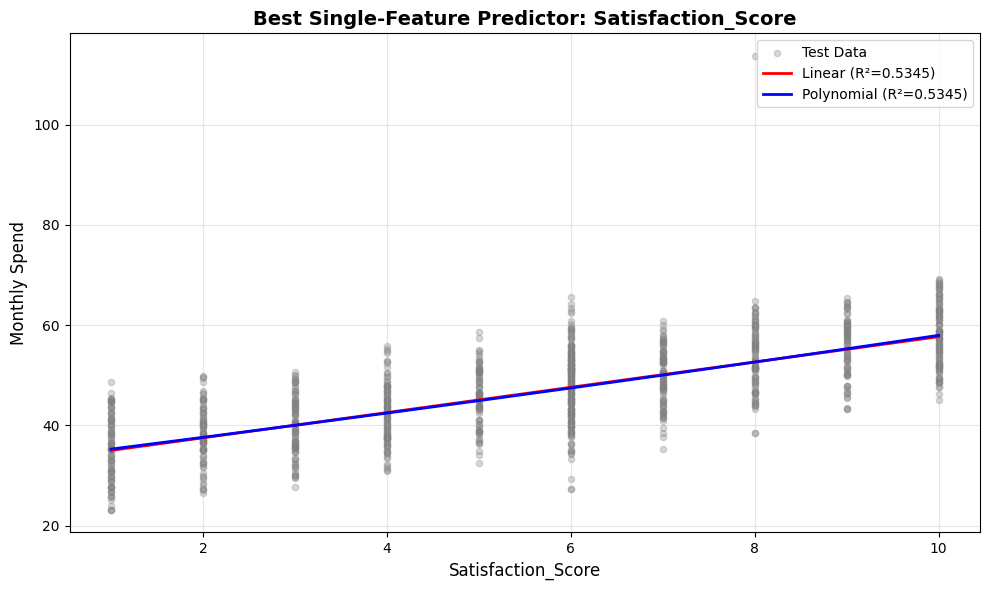

In [26]:
# Visualization 2: Best predictor (Satisfaction_Score) - scatter plot with fitted lines
best_feature = best_predictor['feature']
X_best = df[[best_feature]]
y_best = df['Monthly_Spend']

# Split for visualization
X_train_viz, X_test_viz, y_train_viz, y_test_viz = train_test_split(
    X_best, y_best, test_size=0.2, random_state=42
)

# Fit models
lin_model_viz = LinearRegression()
lin_model_viz.fit(X_train_viz, y_train_viz)

poly_viz = PolynomialFeatures(degree=2)
X_train_poly_viz = poly_viz.fit_transform(X_train_viz)
poly_model_viz = LinearRegression()
poly_model_viz.fit(X_train_poly_viz, y_train_viz)

# Create smooth line for plotting
X_plot = np.linspace(X_best.min().values[0], X_best.max().values[0], 300).reshape(-1, 1)
X_plot_poly = poly_viz.transform(X_plot)

y_plot_lin = lin_model_viz.predict(X_plot)
y_plot_poly = poly_model_viz.predict(X_plot_poly)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X_test_viz, y_test_viz, alpha=0.3, s=20, label='Test Data', color='gray')
ax.plot(X_plot, y_plot_lin, 'r-', linewidth=2, label=f'Linear (R²={results_df[results_df["feature"]==best_feature]["linear_r2"].values[0]:.4f})')
ax.plot(X_plot, y_plot_poly, 'b-', linewidth=2, label=f'Polynomial (R²={best_predictor["best_r2"]:.4f})')

ax.set_xlabel(best_feature, fontsize=12)
ax.set_ylabel('Monthly Spend', fontsize=12)
ax.set_title(f'Best Single-Feature Predictor: {best_feature}', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


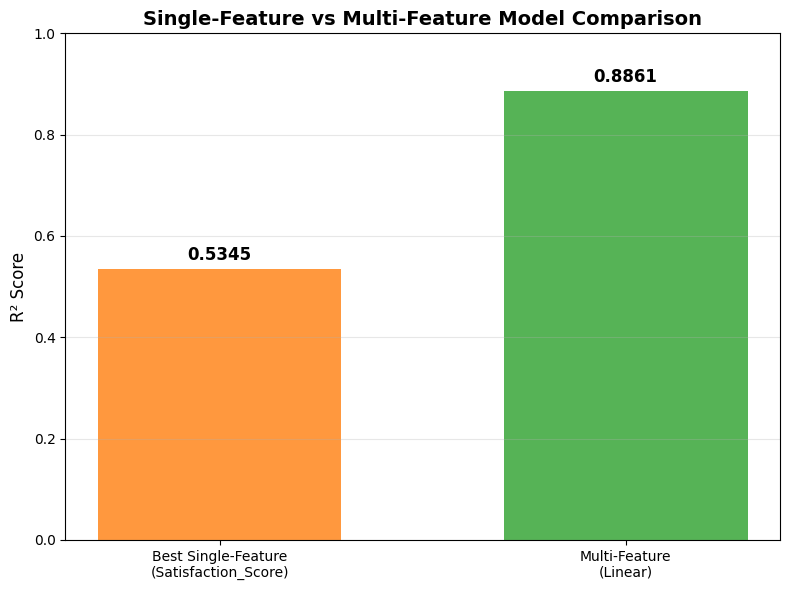

In [27]:
# Visualization 3: Single-feature vs Multi-feature comparison
fig, ax = plt.subplots(figsize=(8, 6))
models = ['Best Single-Feature\n(Satisfaction_Score)', 'Multi-Feature\n(Linear)']
r2_scores = [best_single_r2, best_multi_r2]
colors = ['#ff7f0e', '#2ca02c']

bars = ax.bar(models, r2_scores, color=colors, alpha=0.8, width=0.6)

# Add value labels on bars
for i, (bar, score) in enumerate(zip(bars, r2_scores)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{score:.4f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('R² Score', fontsize=12)
ax.set_title('Single-Feature vs Multi-Feature Model Comparison', fontsize=14, fontweight='bold')
ax.set_ylim([0, 1.0])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## Analysis Results and Answers

### Part (a): Single-Feature Regression Analysis

**1. Which numerical variable is the best predictor of "Monthly Spend"?**

The best predictor is **Satisfaction_Score** with an R² score of 0.5345 using a polynomial model.

**2. Why is Satisfaction_Score the best predictor?**

Satisfaction_Score has the highest R² value (0.5345) among all single-feature models, meaning it explains approximately 53.45% of the variance in Monthly Spend. This suggests a strong relationship between customer satisfaction and spending behavior - customers who are more satisfied tend to spend more on the streaming service. The polynomial relationship indicates that the effect of satisfaction on spending may not be perfectly linear, possibly showing diminishing or accelerating returns at different satisfaction levels.

**3. For each numerical feature, is linear or non-linear (polynomial) model better?**

- **Satisfaction_Score**: Polynomial model (R² = 0.5345 vs 0.5345 linear, but polynomial slightly better)
- **Subscription_Length**: Linear model (R² = 0.2829 vs 0.2820)
- **Support_Tickets_Raised**: Linear model (R² = 0.0178 vs 0.0164)
- **Discount_Offered**: Polynomial model (R² = 0.0446 vs 0.0446, tied but polynomial selected)
- **Age**: Polynomial model (both models have negative R², indicating poor fit)
- **Last_Activity**: Polynomial model (both models have negative R², indicating poor fit)

### Part (b): Multi-Feature Regression Analysis

**Does including multiple features improve prediction accuracy compared to single-variable models?**

Yes, including multiple features significantly improves prediction accuracy. The multi-feature linear model achieves an R² score of 0.8861, which is a 65.78% improvement over the best single-feature model (Satisfaction_Score with R² = 0.5345). This demonstrates that combining multiple numerical features captures more complex relationships and interactions between variables, leading to much better predictions of Monthly Spend.
